# Project - Drug Performance Evaluation
#### By Gerardo Mora Cuevas

### Machine Learning Integration and Model Evaluation

### Dataset: drug_cleaned

First, let's import the dataset, which is a csv file:

In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv("Drug_clean.csv")

Also, I need to import all the necessary libraries:

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.linear_model import HuberRegressor, LassoCV, RidgeCV


import matplotlib.pyplot as plt
import seaborn as sns

## Effectiveness of a Drug based on the features EaseOfUse, Price, Reviews and Satifaction

Selecction of Features (X) and Target Variable (y):

In [3]:
X = df[["EaseOfUse", "Price", "Reviews", "Satisfaction"]]
y = df["Effective"]

Divide the dataset into train and test:

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Some models can performe better with scaler features:

In [5]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Let's create a function to train and evaluate the models:

In [6]:
def train_and_evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    #Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"Mean Squared Error: {mse:.2f}")
    print(f"R2 Score: {r2:.2f}")
    
    #Show Predictions vs Real Values
    plt.figure(figsize=(10,6))
    plt.scatter(y_test, y_pred, c = "blue", label = "Predicted", alpha = 0.6)
    plt.scatter(y_test, y_test, c= "red", label = "Real", alpha = 0.6)
    plt.xlabel("Real")
    plt.ylabel("Predicted")
    plt.title("Predictions vs Real Values")
    plt.legend()
    plt.show()    

This function fit and train the model. Also, it calculates the mean squared error and the R2 score to evaluate the model performance, including a scatterplot with the real and predicted values.

### Random Forest Regression

Defining the model object and calling the function:

Mean Squared Error: 0.25
R2 Score: 0.70


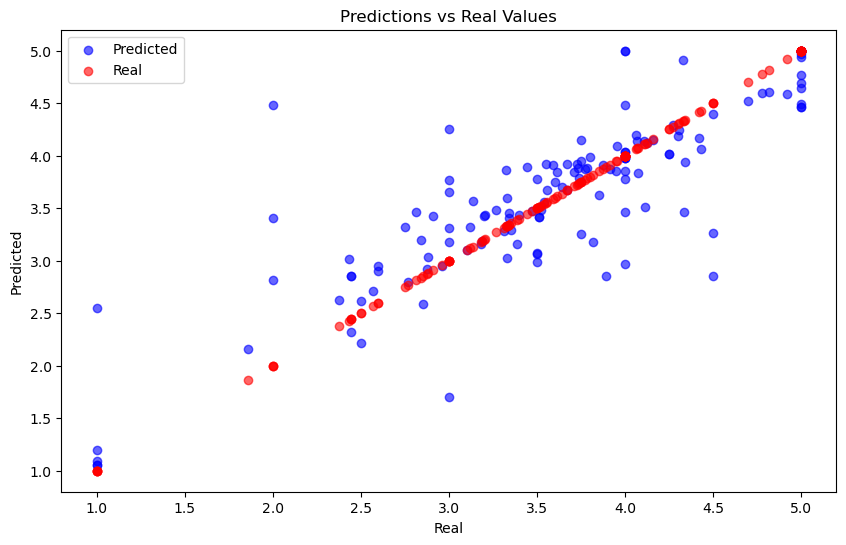

In [7]:
rf_model = RandomForestRegressor(random_state=42)
train_and_evaluate_model(rf_model,X_train_scaled, y_train, X_test_scaled, y_test)

Mean Squared Error: 0.25

R2 Score: 0.70

### Linear Regression

Defining the model object and calling the function:

Mean Squared Error: 0.28
R2 Score: 0.66


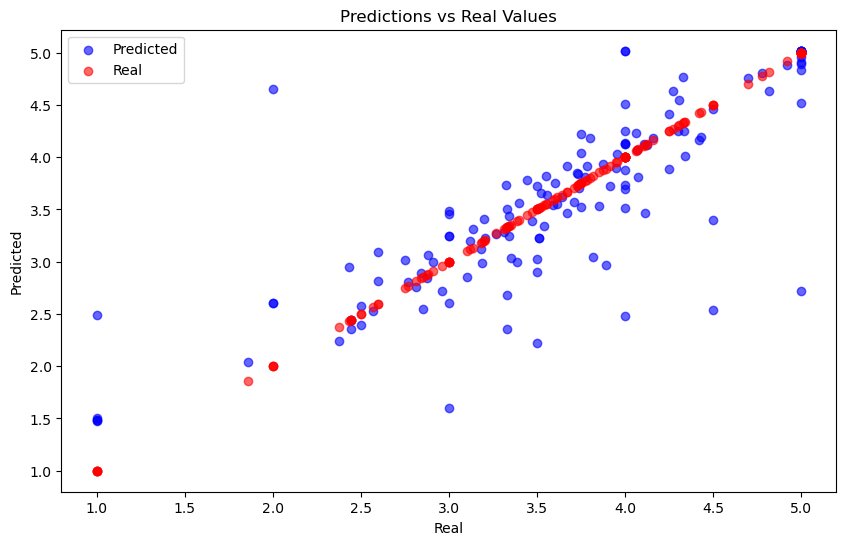

In [8]:
lr_model = LinearRegression()
train_and_evaluate_model(lr_model,X_train_scaled, y_train, X_test_scaled, y_test)

### Support Vector Regressor (SVR)

Defining the model object and calling the function:

Mean Squared Error: 0.30
R2 Score: 0.63


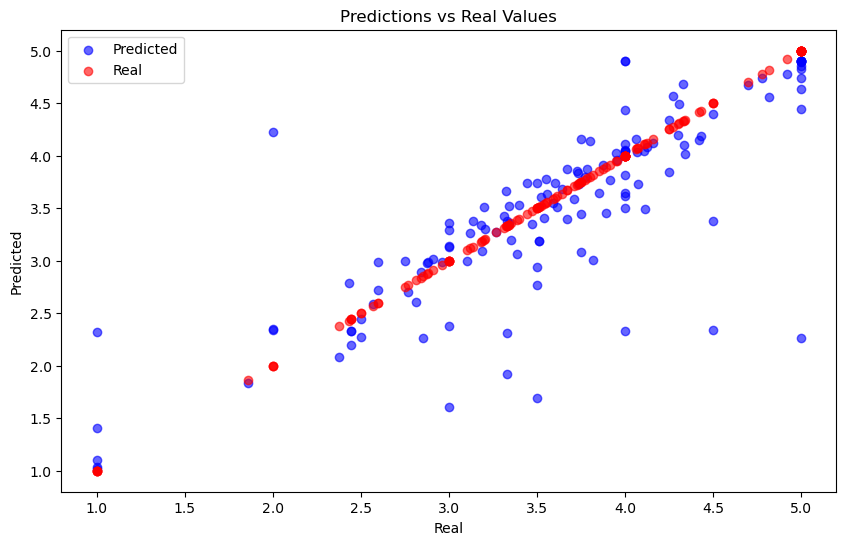

In [9]:
svr_model = SVR()
train_and_evaluate_model(svr_model, X_train_scaled, y_train, X_test_scaled, y_test)

### Huber Regressor

Defining the model object and calling the function:

Mean Squared Error: 0.29
R2 Score: 0.65


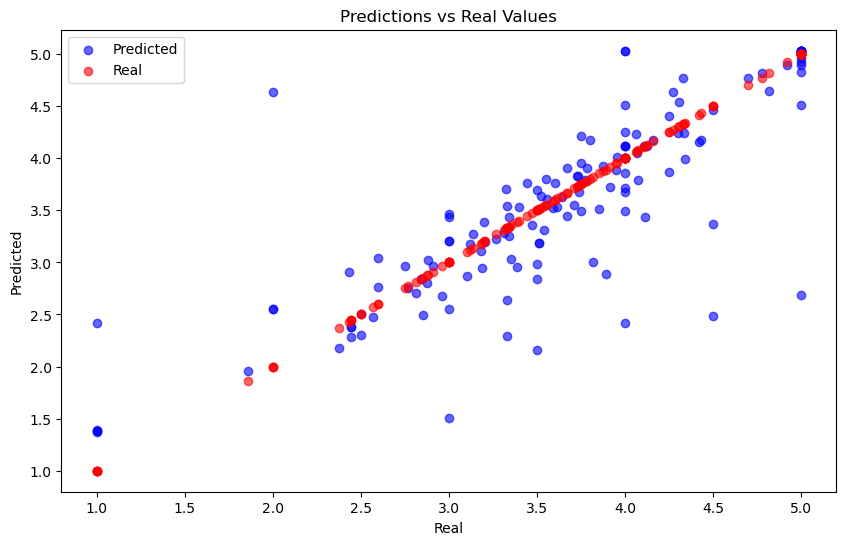

In [10]:
Huber_model = HuberRegressor()
train_and_evaluate_model(Huber_model, X_train_scaled, y_train, X_test_scaled, y_test)

### LassoCV

Defining the model object and calling the function:

Mean Squared Error: 0.28
R2 Score: 0.66


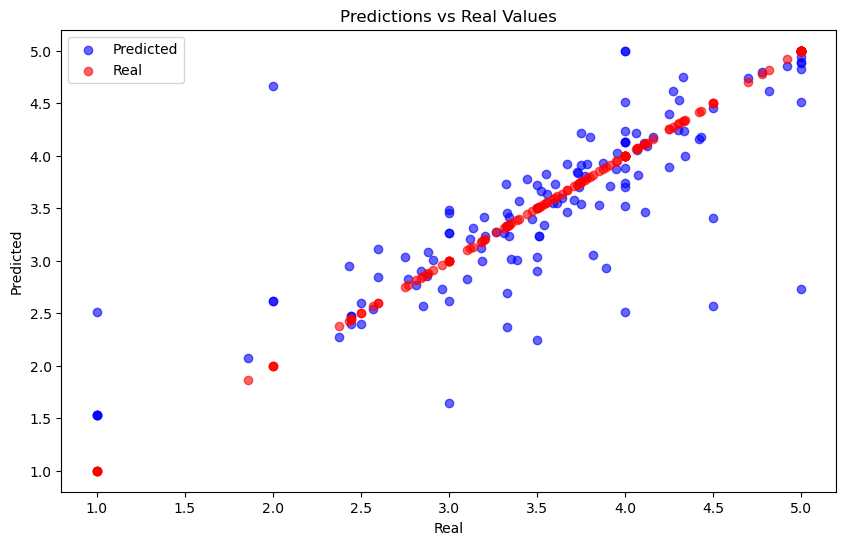

In [11]:
LassoCV_model = LassoCV()
train_and_evaluate_model(LassoCV_model, X_train_scaled, y_train, X_test_scaled, y_test)

### RidgeCV

Defining the model object and calling the function:

Mean Squared Error: 0.28
R2 Score: 0.66


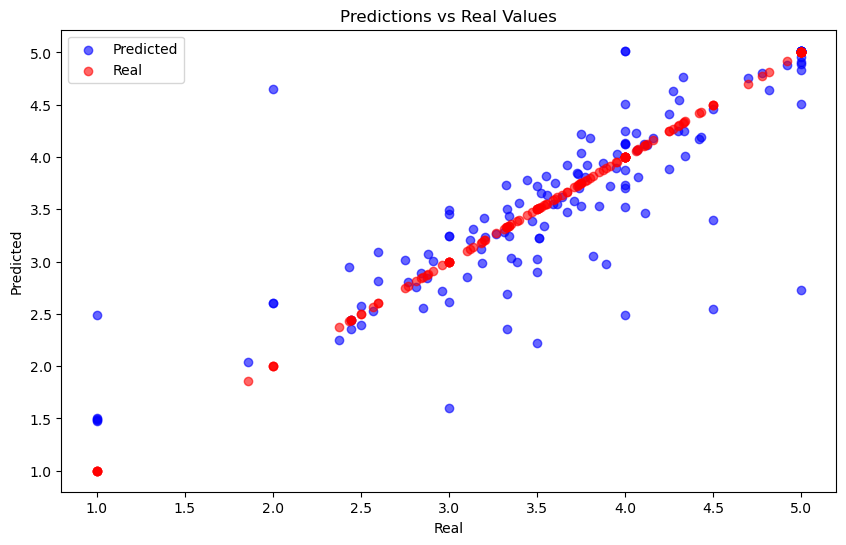

In [12]:
RidgeCV_model = RidgeCV()
train_and_evaluate_model(RidgeCV_model, X_train_scaled, y_train, X_test_scaled, y_test)

### Gradient Boosting Regressor

Defining the model object and calling the function:

Mean Squared Error: 0.23
R2 Score: 0.71


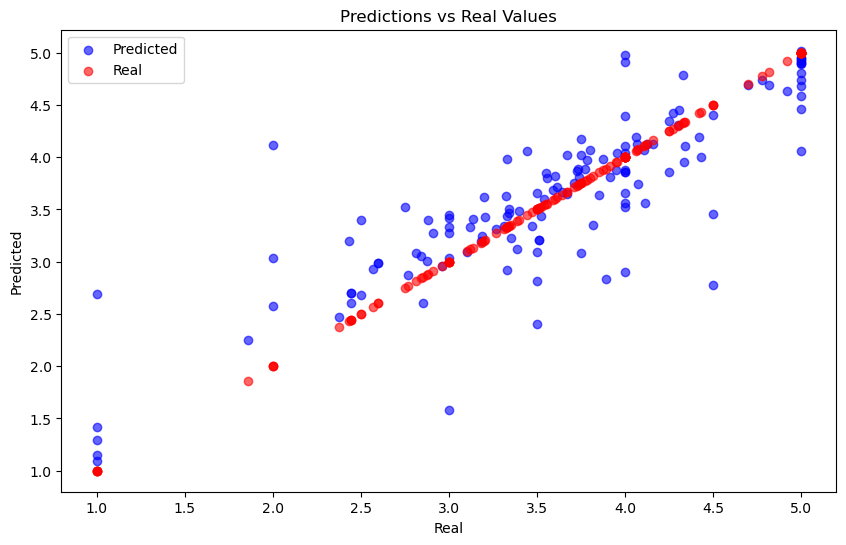

In [13]:
GBR_model = GradientBoostingRegressor()
train_and_evaluate_model(GBR_model, X_train_scaled, y_train, X_test_scaled, y_test)

### Model Metrics Comparison

Defining a function that graphs the evaluation metrics of each model:

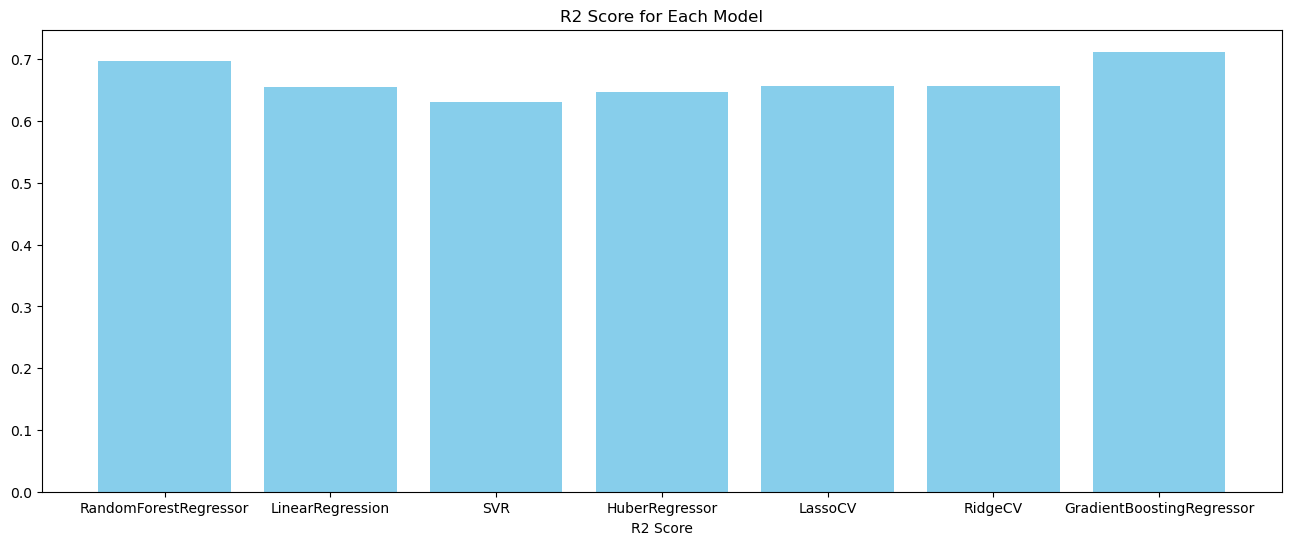

In [14]:
def plot_r2_scores(models, X_train, y_train, X_test, y_test):
    r2_scores = []

    for model in models:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        r2 = r2_score(y_test, y_pred)
        r2_scores.append(r2)

    plt.figure(figsize=(16, 6))
    plt.bar([str(model.__class__.__name__) for model in models], r2_scores, color='skyblue')
    plt.xlabel('R2 Score')
    plt.title('R2 Score for Each Model')
    plt.show()

# Lista de modelos a probar
models_to_test = [
    RandomForestRegressor(random_state=42),
    LinearRegression(),
    SVR(),
    HuberRegressor(),
    LassoCV(),
    RidgeCV(),
    GradientBoostingRegressor()
]

plot_r2_scores(models_to_test, X_train_scaled, y_train, X_test_scaled, y_test)


## Relation between Price and Effectiveness

Now, let's create a model with the relation between Price and Effectiveness. Let's define the Features(Price, Satisfaction) and the Target variable (Effective):

In [15]:
y = df["Effective"]
X = df[["Price","Satisfaction"]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
lm = LinearRegression()
lm.fit(X_train,y_train)
y_pred = lm.predict(X_test)

r2_lm = r2_score(y_test,y_pred)
print(f"R2 Score: {r2_lm:.5f}")

R2 Score: 0.60905


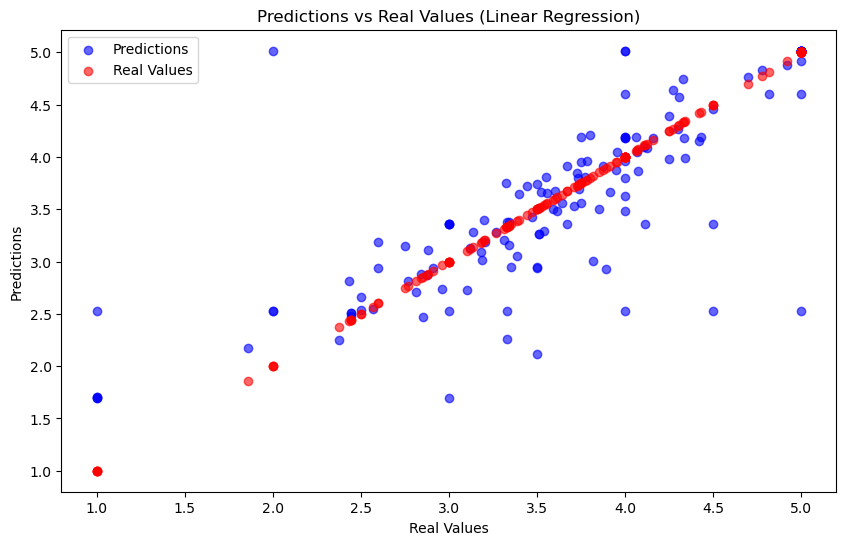

In [17]:
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred, c='blue', label = 'Predictions', alpha=0.6)
plt.scatter(y_test, y_test, c='red', label = 'Real Values', alpha=0.6)
plt.xlabel("Real Values")
plt.ylabel("Predictions")
plt.title("Predictions vs Real Values (Linear Regression)")
plt.legend()
plt.show()

## Comparison Between Different Medical Conditions

In [18]:
X = df[["Condition","Effective"]]
y = df["Satisfaction"]

X = pd.get_dummies(X,columns=["Condition"],drop_first=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
lm = LinearRegression()
lm.fit(X_train,y_train)
y_pred = lm.predict(X_test)

r2_lm = r2_score(y_test,y_pred)
print(f"R2 Score: {r2_lm:.2f}")

R2 Score: 0.68


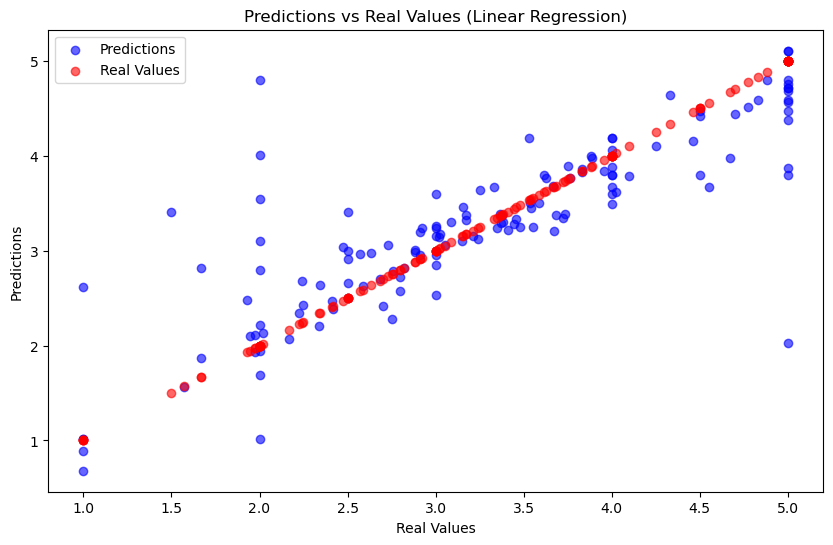

In [20]:
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred, c='blue', label = 'Predictions', alpha=0.6)
plt.scatter(y_test, y_test, c='red', label = 'Real Values', alpha=0.6)
plt.xlabel("Real Values")
plt.ylabel("Predictions")
plt.title("Predictions vs Real Values (Linear Regression)")
plt.legend()
plt.show()

Mean Squared Error: 0.43
R2 Score: 0.61


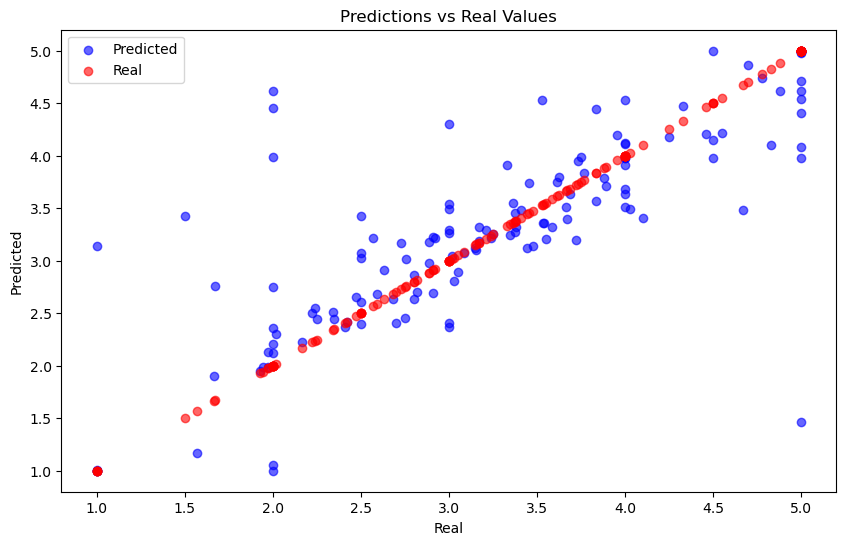

In [21]:
rf_model = RandomForestRegressor(random_state=42)
train_and_evaluate_model(rf_model,X_train, y_train, X_test, y_test)

Mean Squared Error: 0.35
R2 Score: 0.68


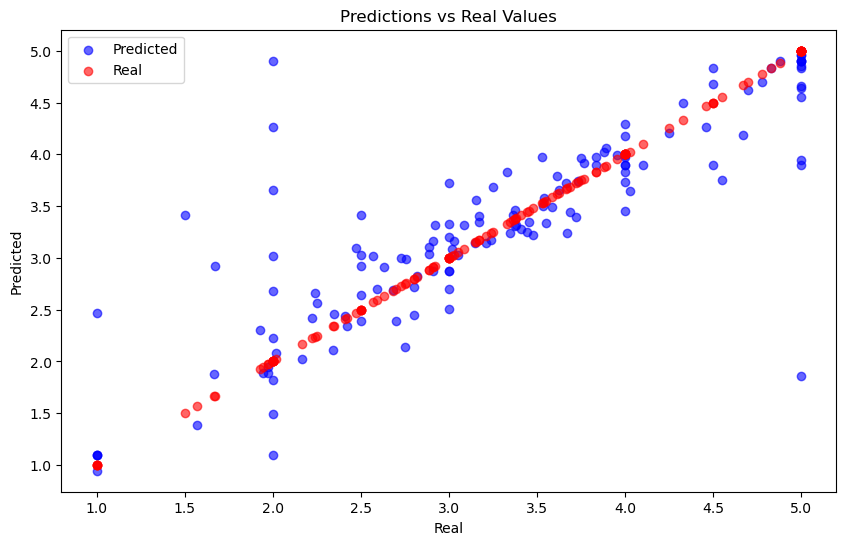

In [22]:
svr_model = SVR()
train_and_evaluate_model(svr_model, X_train, y_train, X_test, y_test)

D:\Mora\Programas\Anaconda\Anaconda\Lib\site-packages\sklearn\linear_model\_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Mean Squared Error: 0.34
R2 Score: 0.69


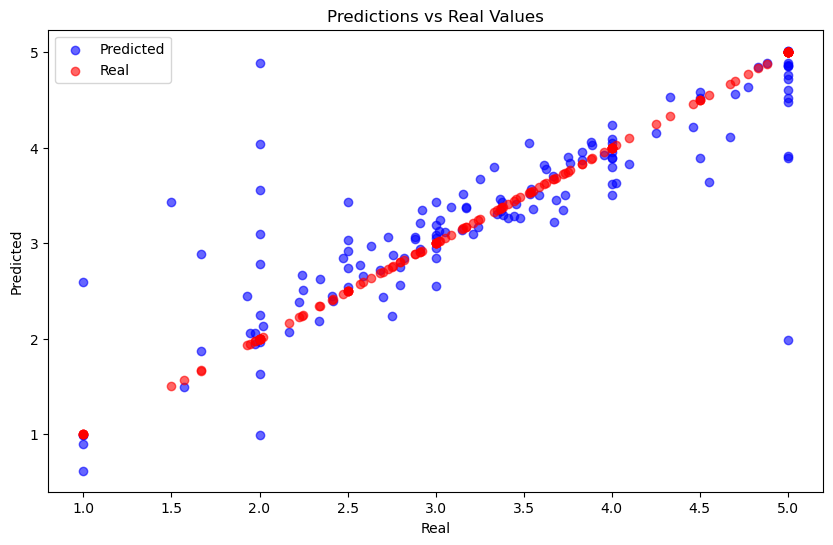

In [23]:
Huber_model = HuberRegressor()
train_and_evaluate_model(Huber_model, X_train, y_train, X_test, y_test)

Mean Squared Error: 0.35
R2 Score: 0.68


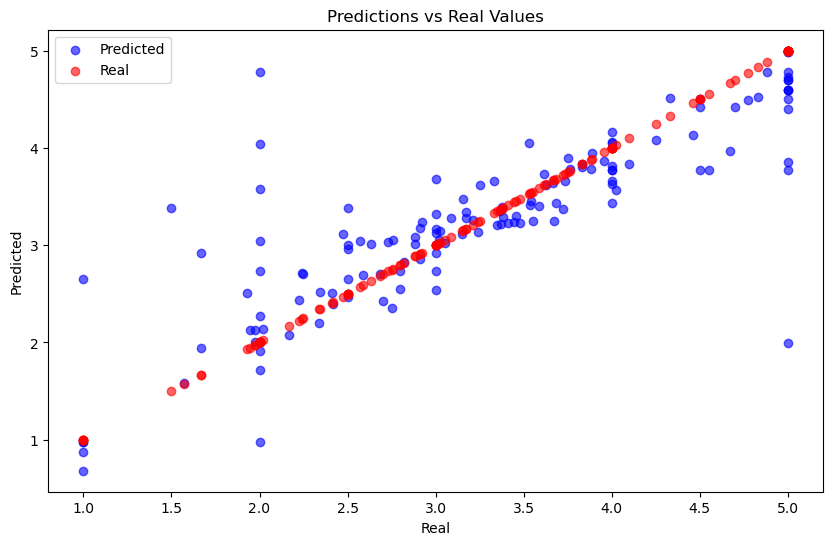

In [24]:
LassoCV_model = LassoCV()
train_and_evaluate_model(LassoCV_model, X_train, y_train, X_test, y_test)

Mean Squared Error: 0.39
R2 Score: 0.65


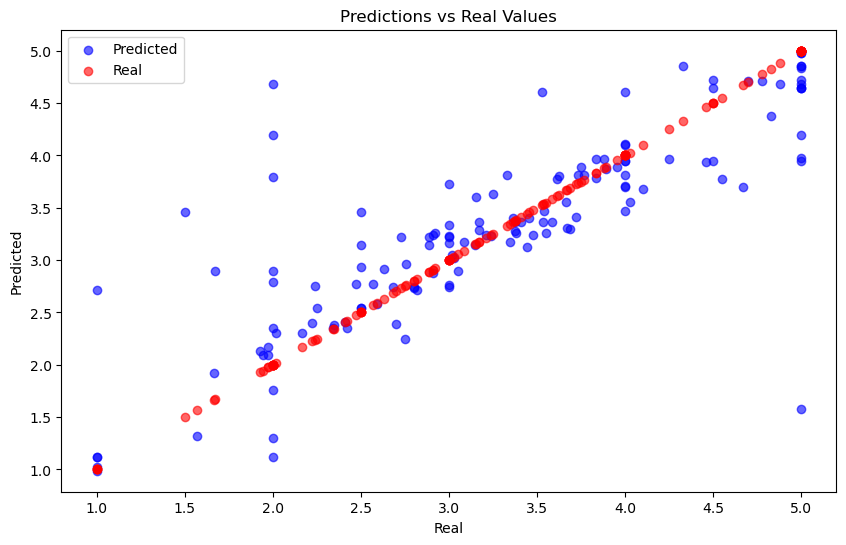

In [25]:
GBR_model = GradientBoostingRegressor()
train_and_evaluate_model(GBR_model, X_train, y_train, X_test, y_test)